In [72]:
import pandas as pd
import numpy as np

In [73]:
hdi_data = pd.read_excel('World_Suicide_rates.xlsx', 'HDI')
gdi_data = pd.read_excel('World_Suicide_rates.xlsx', 'GDI')
suicide_data = pd.read_excel('World_Suicide_rates.xlsx', 'World_Sucide_rates')
life_expectancy = pd.read_excel('World_Suicide_rates.xlsx', 'LifeExpectancy')
hdi_data = hdi_data[hdi_data['Level'] == 'National']
gdi_data = gdi_data[gdi_data['Level'] == 'National']
hdi_data.head()

,Country,ISO_Code,Level,GDLCODE,Region,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,National,AFGt,Total,0.302,0.308,0.314,0.312,0.307,...,0.471,0.477,0.490,0.497,0.500,0.499,0.502,0.506,0.509,0.511
9,Albania,ALB,National,ALBt,Total,0.649,0.631,0.615,0.617,0.624,...,0.745,0.764,0.775,0.781,0.787,0.787,0.787,0.790,0.793,0.794
22,Algeria,DZA,National,DZAt,Total,0.573,0.577,0.582,0.586,0.590,...,0.720,0.729,0.728,0.729,0.736,0.739,0.742,0.746,0.747,0.748
30,Andorra,AND,National,ANDt,Total,NaN,NaN,NaN,NaN,NaN,...,0.838,0.837,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
31,Angola,AGO,National,AGOt,Total,NaN,NaN,NaN,NaN,NaN,...,0.517,0.532,0.544,0.556,0.565,0.572,0.578,0.582,0.582,0.582


In [74]:
suicide_data = suicide_data.dropna(axis=1, how='all')
# suicide_data = suicide_data[suicide_data.all(suicide_data['Location type'] == 'Country' and suicide_data['Period type'] == 'Year')]
suicide_data = suicide_data.drop(columns=['IndicatorCode','Indicator', 'ValueType', 'Location type', 'Period type', 'IsLatestYear', 'Dim1 type', 'Language', 'DateModified'])
m_suicide_data = suicide_data[suicide_data['Dim1'] == 'Male']
f_suicide_data = suicide_data[suicide_data['Dim1'] == 'Female']
bt_suicide_data = suicide_data[suicide_data['Dim1'] == 'Both sexes']
bt_suicide_data

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2019,Both sexes,BTSX,5.96,3.40,9.91,5.96 [3.4 – 9.91]
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2018,Both sexes,BTSX,5.91,3.38,9.81,5.91 [3.38 – 9.81]
7,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,Both sexes,BTSX,5.95,3.42,9.88,5.95 [3.42 – 9.88]
10,EMR,Eastern Mediterranean,AFG,Afghanistan,2016,Both sexes,BTSX,6.01,3.48,9.93,6.01 [3.48 – 9.93]
13,EMR,Eastern Mediterranean,AFG,Afghanistan,2015,Both sexes,BTSX,5.99,3.48,9.88,5.99 [3.48 – 9.88]
...,...,...,...,...,...,...,...,...,...,...,...
10966,AFR,Africa,ZWE,Zimbabwe,2004,Both sexes,BTSX,21.47,11.41,33.75,21.47 [11.41 – 33.75]
10969,AFR,Africa,ZWE,Zimbabwe,2003,Both sexes,BTSX,20.23,10.69,31.68,20.23 [10.69 – 31.68]
10972,AFR,Africa,ZWE,Zimbabwe,2002,Both sexes,BTSX,20.34,10.74,31.95,20.34 [10.74 – 31.95]
10975,AFR,Africa,ZWE,Zimbabwe,2001,Both sexes,BTSX,19.53,10.23,30.75,19.53 [10.23 – 30.75]


In [45]:
gdi_data = gdi_data.drop(columns=['ISO_Code', 'Level', 'GDLCODE', 'Region'])
gdi_data.index = range(0,len(gdi_data))
gdi_data
gdi_new = gdi_data.melt(id_vars=['Country'], var_name='Year', value_name='GDI')
gdi_new

,Country,Year,GDI
0,Afghanistan,1990,NaN
1,Albania,1990,NaN
2,Algeria,1990,NaN
3,Angola,1990,NaN
4,Argentina,1990,NaN
...,...,...,...
4975,Venezuela,2019,1.010
4976,Vietnam,2019,0.998
4977,Yemen,2019,0.490
4978,Zambia,2019,0.959


In [47]:
hdi_data = hdi_data.drop(columns=['ISO_Code', 'Level', 'GDLCODE', 'Region'])
hdi_data.index = range(0,len(hdi_data))
hdi_data

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.302,0.308,0.314,0.312,0.307,0.331,0.335,0.340,0.343,...,0.471,0.477,0.490,0.497,0.500,0.499,0.502,0.506,0.509,0.511
1,Albania,0.649,0.631,0.615,0.617,0.624,0.637,0.646,0.645,0.656,...,0.745,0.764,0.775,0.781,0.787,0.787,0.787,0.790,0.793,0.794
2,Algeria,0.573,0.577,0.582,0.586,0.590,0.594,0.603,0.611,0.620,...,0.720,0.729,0.728,0.729,0.736,0.739,0.742,0.746,0.747,0.748
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.838,0.837,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.532,0.544,0.556,0.565,0.572,0.578,0.582,0.582,0.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,0.645,0.654,0.660,0.661,0.661,0.666,0.668,0.670,0.672,...,0.758,0.770,0.771,0.777,0.775,0.770,0.759,0.742,0.732,0.711
182,Vietnam,0.483,0.493,0.504,0.513,0.526,0.536,0.548,0.546,0.568,...,0.661,0.671,0.677,0.681,0.683,0.689,0.694,0.696,0.700,0.704
183,Yemen,0.400,0.401,0.404,0.407,0.409,0.415,0.422,0.426,0.432,...,0.506,0.506,0.505,0.509,0.502,0.484,0.474,0.467,0.468,0.470
184,Zambia,0.421,0.417,0.416,0.419,0.414,0.415,0.415,0.416,0.415,...,0.527,0.534,0.549,0.557,0.560,0.569,0.572,0.578,0.582,0.585


In [48]:
hdi_new = hdi_data.melt(id_vars=['Country'], var_name='Year', value_name='HDI')
hdi_new

,Country,Year,HDI
0,Afghanistan,1990,0.302
1,Albania,1990,0.649
2,Algeria,1990,0.573
3,Andorra,1990,NaN
4,Angola,1990,NaN
...,...,...,...
5575,Venezuela,2019,0.711
5576,Vietnam,2019,0.704
5577,Yemen,2019,0.470
5578,Zambia,2019,0.585


In [57]:
life_expectancy = life_expectancy[life_expectancy['Level'] == 'National']
life_expectancy = life_expectancy.drop(columns=['ISO_Code', 'Level', 'GDLCODE', 'Region'])
new_lifeExp = life_expectancy.melt(id_vars=['Country'], var_name='Year', value_name='Life Expectancy')
new_lifeExp.sort_values()


,Country,Year,Life Expectancy
0,Afghanistan,1990,50.3
1,Albania,1990,71.8
2,Algeria,1990,66.9
3,Andorra,1990,NaN
4,Angola,1990,NaN
...,...,...,...
5575,Venezuela,2019,72.1
5576,Vietnam,2019,75.4
5577,Yemen,2019,66.1
5578,Zambia,2019,63.9


In [65]:
combined_indices = pd.merge(hdi_new, gdi_new, on=['Country', 'Year'], how='outer')
combined_indices = pd.merge(combined_indices, new_lifeExp, on=['Country', 'Year'], how='outer')
combined_indices

,Country,Year,HDI,GDI,Life Expectancy
0,Afghanistan,1990,0.302,NaN,50.3
1,Albania,1990,0.649,NaN,71.8
2,Algeria,1990,0.573,NaN,66.9
3,Andorra,1990,NaN,NaN,NaN
4,Angola,1990,NaN,NaN,NaN
...,...,...,...,...,...
5575,Venezuela,2019,0.711,1.010,72.1
5576,Vietnam,2019,0.704,0.998,75.4
5577,Yemen,2019,0.470,0.490,66.1
5578,Zambia,2019,0.585,0.959,63.9


In [70]:
combined_indices.to_excel('IndicesWithLifeExpectancy.xlsx')

In [76]:
bt_suicide_data = bt_suicide_data.rename(columns={'Period': 'Year', 'Location' : 'Country'})
all_values = pd.merge(bt_suicide_data, combined_indices, on=['Country', 'Year'], how='outer')
all_values

C:\Users\jt271\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,ParentLocationCode,ParentLocation,SpatialDimValueCode,Country,Year,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,HDI,GDI,Life Expectancy
0,EMR,Eastern Mediterranean,AFG,Afghanistan,2019.0,Both sexes,BTSX,5.96,3.40,9.91,5.96 [3.4 – 9.91],0.511,0.658,64.8
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2018.0,Both sexes,BTSX,5.91,3.38,9.81,5.91 [3.38 – 9.81],0.509,0.662,64.5
2,EMR,Eastern Mediterranean,AFG,Afghanistan,2017.0,Both sexes,BTSX,5.95,3.42,9.88,5.95 [3.42 – 9.88],0.506,0.658,64.1
3,EMR,Eastern Mediterranean,AFG,Afghanistan,2016.0,Both sexes,BTSX,6.01,3.48,9.93,6.01 [3.48 – 9.93],0.502,0.646,63.8
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2015.0,Both sexes,BTSX,5.99,3.48,9.88,5.99 [3.48 – 9.88],0.499,0.640,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,NaN,NaN,NaN,Trinidad & Tobago,2019,NaN,NaN,NaN,NaN,NaN,NaN,0.796,1.003,73.5
6116,NaN,NaN,NaN,United Kingdom,2019,NaN,NaN,NaN,NaN,NaN,NaN,0.932,0.970,81.3
6117,NaN,NaN,NaN,United States,2019,NaN,NaN,NaN,NaN,NaN,NaN,0.926,0.994,78.9
6118,NaN,NaN,NaN,Venezuela,2019,NaN,NaN,NaN,NaN,NaN,NaN,0.711,1.010,72.1


In [80]:
suicide_data = suicide_data.drop(columns='Dim1ValueCode')
suicide_data.to_excel('Suicide_Data.xlsx')

In [118]:
all_nonans = all_values.dropna(how='any')
all_nonans

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Country,Year,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,HDI,GDI,Life Expectancy
0,EMR,Eastern Mediterranean,AFG,Afghanistan,2019.0,Both sexes,BTSX,5.96,3.40,9.91,5.96 [3.4 – 9.91],0.511,0.658,64.8
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2018.0,Both sexes,BTSX,5.91,3.38,9.81,5.91 [3.38 – 9.81],0.509,0.662,64.5
2,EMR,Eastern Mediterranean,AFG,Afghanistan,2017.0,Both sexes,BTSX,5.95,3.42,9.88,5.95 [3.42 – 9.88],0.506,0.658,64.1
3,EMR,Eastern Mediterranean,AFG,Afghanistan,2016.0,Both sexes,BTSX,6.01,3.48,9.93,6.01 [3.48 – 9.93],0.502,0.646,63.8
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2015.0,Both sexes,BTSX,5.99,3.48,9.88,5.99 [3.48 – 9.88],0.499,0.640,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,AFR,Africa,ZWE,Zimbabwe,2004.0,Both sexes,BTSX,21.47,11.41,33.75,21.47 [11.41 – 33.75],0.411,0.895,43.1
3656,AFR,Africa,ZWE,Zimbabwe,2003.0,Both sexes,BTSX,20.23,10.69,31.68,20.23 [10.69 – 31.68],0.414,0.894,43.2
3657,AFR,Africa,ZWE,Zimbabwe,2002.0,Both sexes,BTSX,20.34,10.74,31.95,20.34 [10.74 – 31.95],0.423,0.892,43.5
3658,AFR,Africa,ZWE,Zimbabwe,2001.0,Both sexes,BTSX,19.53,10.23,30.75,19.53 [10.23 – 30.75],0.431,0.891,44.0


In [101]:
rm_nans = combined_indices.dropna(how='any')
rm_nans

,Country,Year,HDI,GDI,Life Expectancy
1860,Afghanistan,2000,0.352,0.325,55.8
1861,Albania,2000,0.672,0.935,74.0
1862,Algeria,2000,0.637,0.779,70.6
1866,Argentina,2000,0.782,0.984,73.6
1867,Armenia,2000,0.669,0.942,71.4
...,...,...,...,...,...
5575,Venezuela,2019,0.711,1.010,72.1
5576,Vietnam,2019,0.704,0.998,75.4
5577,Yemen,2019,0.470,0.490,66.1
5578,Zambia,2019,0.585,0.959,63.9


In [89]:
from sklearn.linear_model import LinearRegression

In [111]:
regr = LinearRegression()
X = np.array(rm_nans[['GDI', 'Life Expectancy']])
y = np.array(rm_nans['HDI'])
normalized_X=(X-X.mean())/X.std()
normalized_y=(y-y.mean())/y.std()
regr.fit(normalized_X,y)
print(regr.coef_)
print(regr.intercept_)

[18.66766614  0.47737554]
18.560649280750013


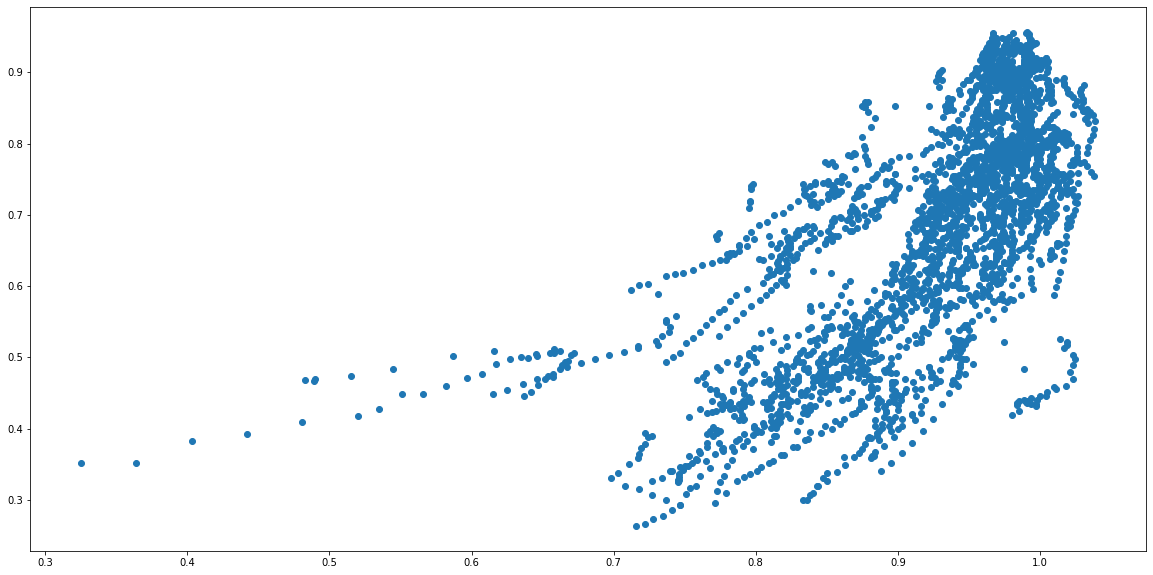

In [117]:
from matplotlib import pyplot as plt
regr_plot = plt.figure(0,figsize=(20,10))
plt.scatter(X[:,0], y)
# plt.plot(normalized_X[:,0], regr.predict(normalized_X))
plt.show()

array([[-0.99975131,  0.5788246 ],
       [-0.98239338,  1.09671701],
       [-0.98683246,  0.99996788],
       ...,
       [-0.99505613,  0.87191756],
       [-0.98171045,  0.80931518],
       [-0.98245029,  0.74102167]])

In [121]:
regr2 = LinearRegression()
y_sr = np.array(all_nonans['FactValueNumeric'])
all_nonans['HDI'] = (all_nonans['HDI'] - all_nonans['HDI'].mean())/all_nonans['HDI'].std()
all_nonans['GDI'] = (all_nonans['GDI'] - all_nonans['GDI'].mean())/all_nonans['GDI'].std()
all_nonans['Life Expectancy'] = (all_nonans['Life Expectancy'] - all_nonans['Life Expectancy'].mean())/all_nonans['Life Expectancy'].std()
x_sr = np.array(all_nonans[['HDI', 'GDI', 'Life Expectancy']])
regr2.fit(x_sr, y_sr)


C:\Users\jt271\AppData\Local\Temp/ipykernel_20720/3583817175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nonans['HDI'] = (all_nonans['HDI'] - all_nonans['HDI'].mean())/all_nonans['HDI'].std()
C:\Users\jt271\AppData\Local\Temp/ipykernel_20720/3583817175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nonans['GDI'] = (all_nonans['GDI'] - all_nonans['GDI'].mean())/all_nonans['GDI'].std()
C:\Users\jt271\AppData\Local\Temp/ipykernel_20720/3583817175.py:5: SettingWithCopyWarning: 
A value is t

LinearRegression()

In [122]:
regr2.coef_

array([  8.66010568,   2.66409773, -13.51787538])

In [124]:
regr2.intercept_

11.500969294920395

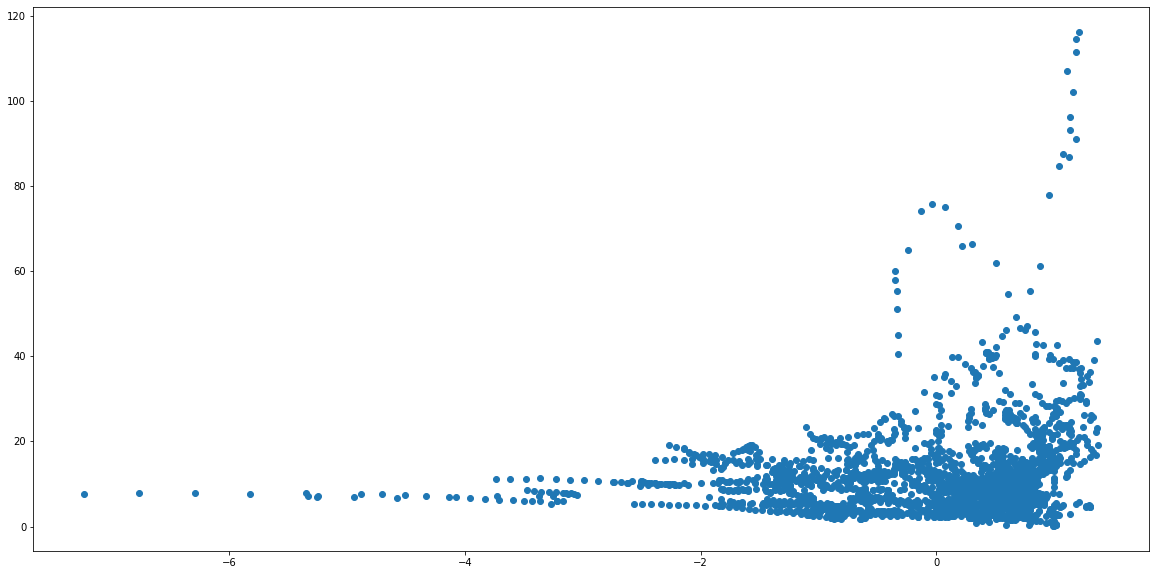

In [126]:
plot2 = plt.figure(1, figsize=(20,10))
plt.scatter(all_nonans['GDI'], all_nonans['FactValueNumeric'])

In [127]:
all_nonans['GDI']

0      -3.218677
1      -3.170450
2      -3.218677
3      -3.363358
4      -3.435698
          ...   
3655   -0.361231
3656   -0.373288
3657   -0.397401
3658   -0.409458
3659   -0.421515
Name: GDI, Length: 2638, dtype: float64